# Estructura de los datos en  R

## Formato ts

#### Datos Mensuales

In [1]:
# datos mensuales
acc <- read.csv('./monthly-traffic-fatalities-in-on.csv')
head(acc)

,Month..Monthly.traffic.fatalities.in.Ontario.1960.1974.
1960-01,61
1960-02,65
1960-03,55
1960-04,56
1960-05,91
1960-06,80


In [2]:
str(acc)

'data.frame':	180 obs. of  1 variable:
 $ Month..Monthly.traffic.fatalities.in.Ontario.1960.1974.: int  61 65 55 56 91 80 135 129 129 130 ...


In [3]:
acc.ts <- ts(data = acc)
head(acc.ts)

[1] 61 65 55 56 91 80

In [4]:
class(acc.ts)

[1] "ts"

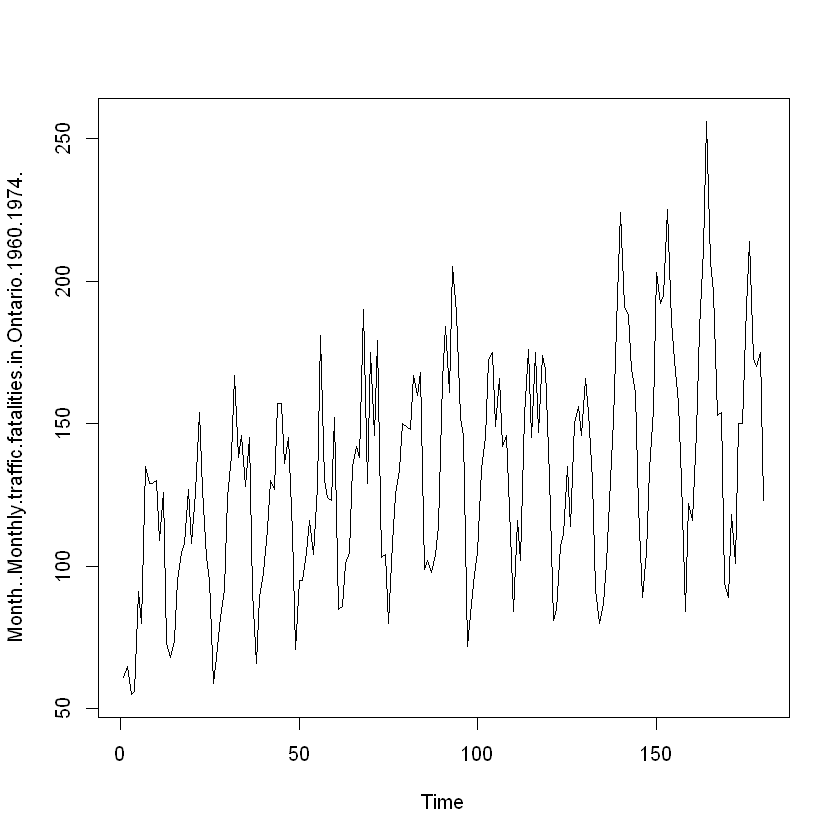

In [5]:
plot(acc.ts, type = 'l')

In [9]:
acc.ts <- ts(data = acc, start = c(1960, 1), frequency = 12)
acc.ts

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1960  61  65  55  56  91  80 135 129 129 130 109 126
1961  73  68  74  95 105 108 127 108 126 154 127 103
1962  95  59  68  82  92 124 139 167 138 146 128 145
1963  91  66  89  98 113 130 127 157 157 136 145 112
1964  71  95  95 105 116 104 128 181 130 124 123 152
1965  85  86 101 105 135 142 138 190 129 175 146 179
1966 103 104  80 108 125 134 150 149 148 167 160 168
1967  99 102  98 104 114 165 184 161 205 189 152 146
1968  72  83  97 105 134 145 172 175 149 166 142 146
1969 111  84 116 102 153 176 145 175 147 174 169 131
1970  81  85 107 111 135 114 150 156 146 166 154 130
1971  92  80  87 101 130 151 195 224 191 188 169 161
1972 121  89 105 134 155 203 192 195 225 186 172 157
1973 130  84 122 116 147 183 211 256 207 196 153 154
1974  94  89 118 101 150 150 191 214 173 170 175 123

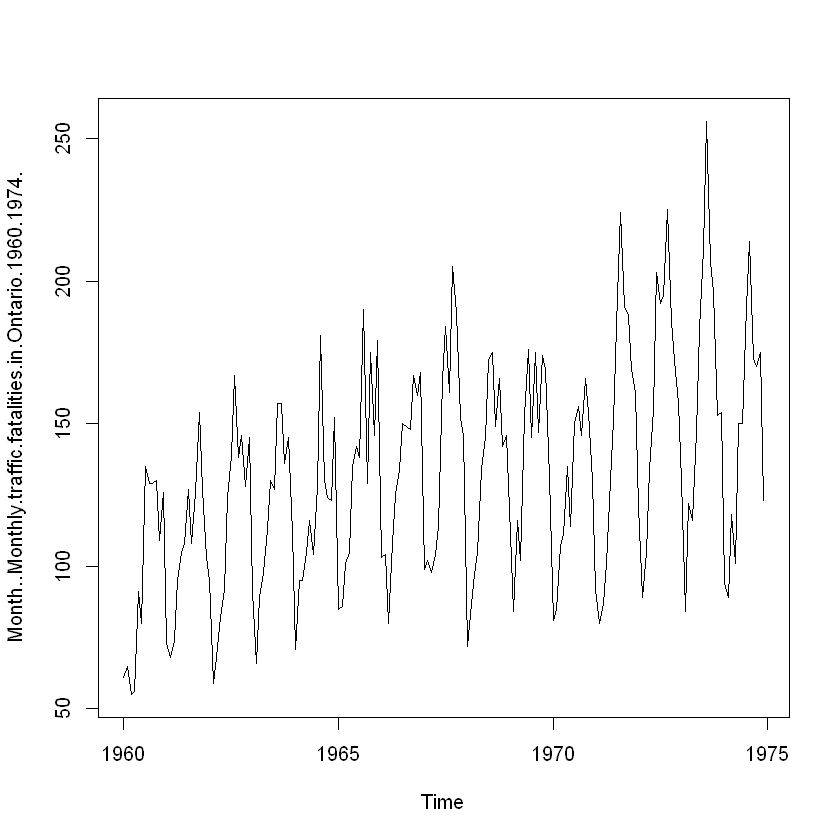

In [10]:
plot(acc.ts, type = 'l')

<br>

#### Datos Cuatrimestrales

In [11]:
prc <- read.csv('./quarterly-australian-national-ac.csv')
head(prc)

,Quarter..Quarterly.Australian.national.accounts.exports..millions.of.dollars.at.1989.90.prices..Sep.59...Jun.95.
1959Q4,2537
1960Q1,3379
1960Q2,2999
1960Q3,2809
1960Q4,2516
1961Q1,2799


In [12]:
str(prc)

'data.frame':	144 obs. of  1 variable:
 $ Quarter..Quarterly.Australian.national.accounts.exports..millions.of.dollars.at.1989.90.prices..Sep.59...Jun.95.: int  2537 3379 2999 2809 2516 2799 3230 3759 3122 3641 ...


In [13]:
prc.ts <- ts(data = prc, start = c(1959, 4), frequency = 4)
prc.ts

      Qtr1  Qtr2  Qtr3  Qtr4
1959                    2537
1960  3379  2999  2809  2516
1961  2799  3230  3759  3122
1962  3641  3584  3610  3035
1963  3620  3518  3487  3708
1964  4190  3959  4026  3605
1965  4057  3970  4211  4011
1966  4113  3841  4083  4201
1967  4232  4492  4905  4583
1968  4894  4460  4754  4723
1969  5447  4728  5016  5675
1970  5838  5752  5926  6223
1971  6482  6032  6725  6773
1972  6916  6859  6845  6753
1973  7355  7155  6693  6693
1974  6833  6254  6460  7006
1975  7234  7069  7458  7388
1976  7384  7436  7761  8481
1977  8124  7631  7830  7979
1978  8590  7957  8289  8195
1979  8866  8888  9173  8820
1980 10058  9468  9258  8611
1981  9220  8671  9236  8693
1982  8740  9320  9868  9448
1983  9724  8479  8999  8885
1984 10141  9774 10542 10819
1985 11199 11272 12050 11372
1986 12457 11684 12169 12284
1987 13457 12820 13794 13606
1988 15114 14769 13514 13916
1989 14931 14089 14877 14745
1990 15274 15450 15512 16099
1991 16956 17008 17925 18184
1992 19138 180

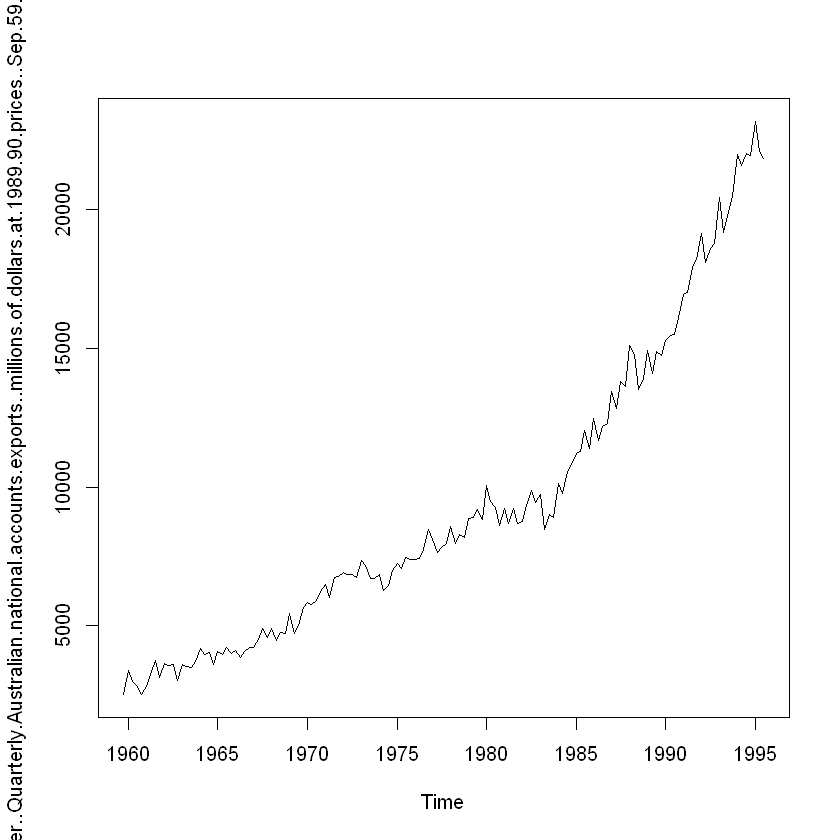

In [14]:
plot(prc.ts, type = 'l')

<br>

#### Método window()

In [16]:
sub.prc.ts <- window(prc.ts, start = c(1960, 1), end = c(1963, 4)) 
sub.prc.ts

     Qtr1 Qtr2 Qtr3 Qtr4
1960 3379 2999 2809 2516
1961 2799 3230 3759 3122
1962 3641 3584 3610 3035
1963 3620 3518 3487 3708

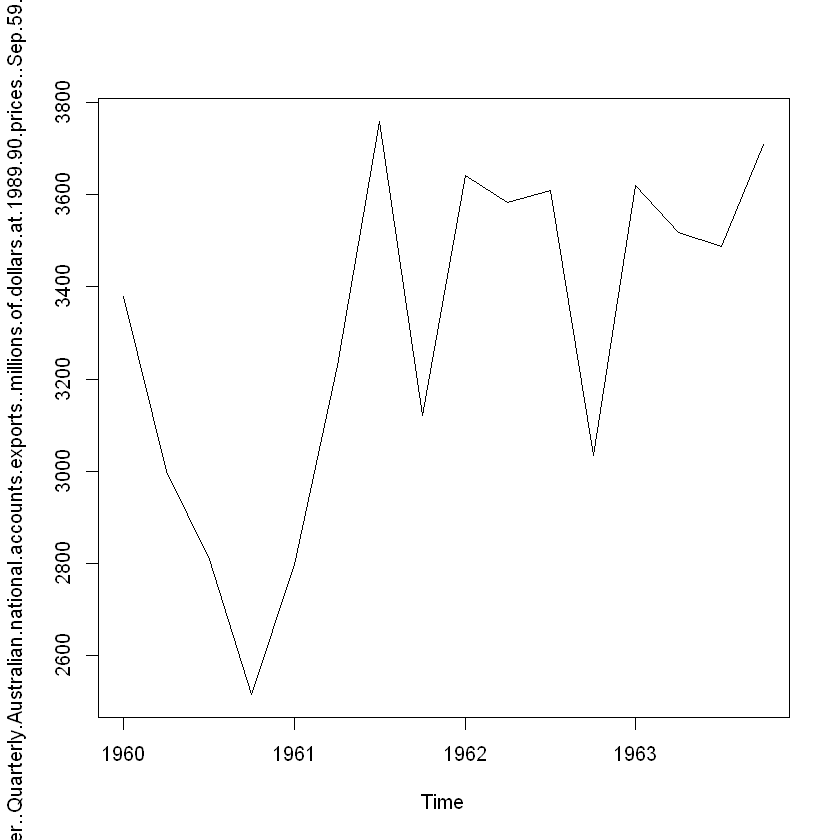

In [17]:
plot(sub.prc.ts)

<br><br>

## Formato zoo

In [21]:
library(zoo)

In [24]:
dt <- seq.Date(from = as.Date('1960-01-01'), to = as.Date('1974-12-01'), by = 'month')
acc.zoo <- zoo(x = acc, order.by = dt)
head(acc.zoo)

           Month..Monthly.traffic.fatalities.in.Ontario.1960.1974.
1960-01-01                                                      61
1960-02-01                                                      65
1960-03-01                                                      55
1960-04-01                                                      56
1960-05-01                                                      91
1960-06-01                                                      80

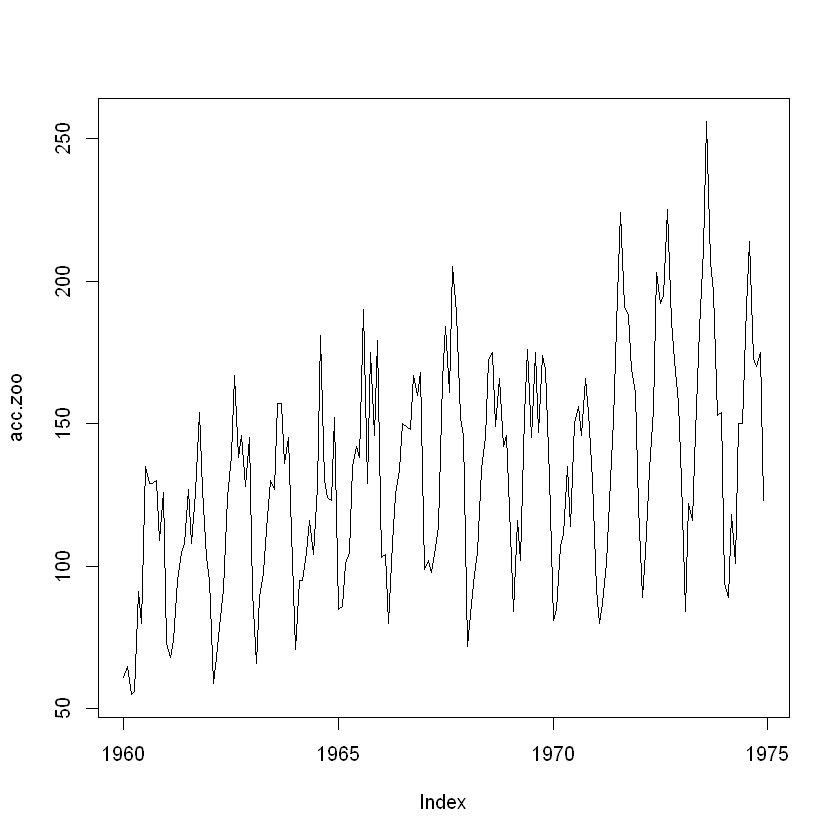

In [25]:
plot(acc.zoo, type = 'l')

<br>

####  Tratamiento de NAs

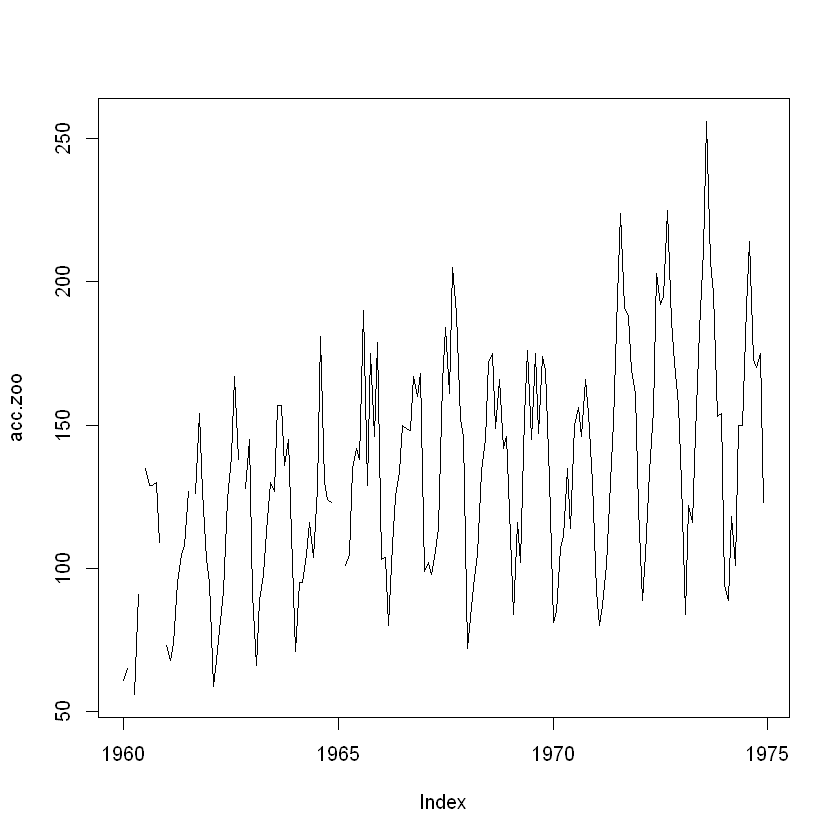

In [27]:
acc.zoo[c(3, 6, 12, 20, 34, 60, 61, 62)] <- NA # añadimos NAs
plot(acc.zoo)

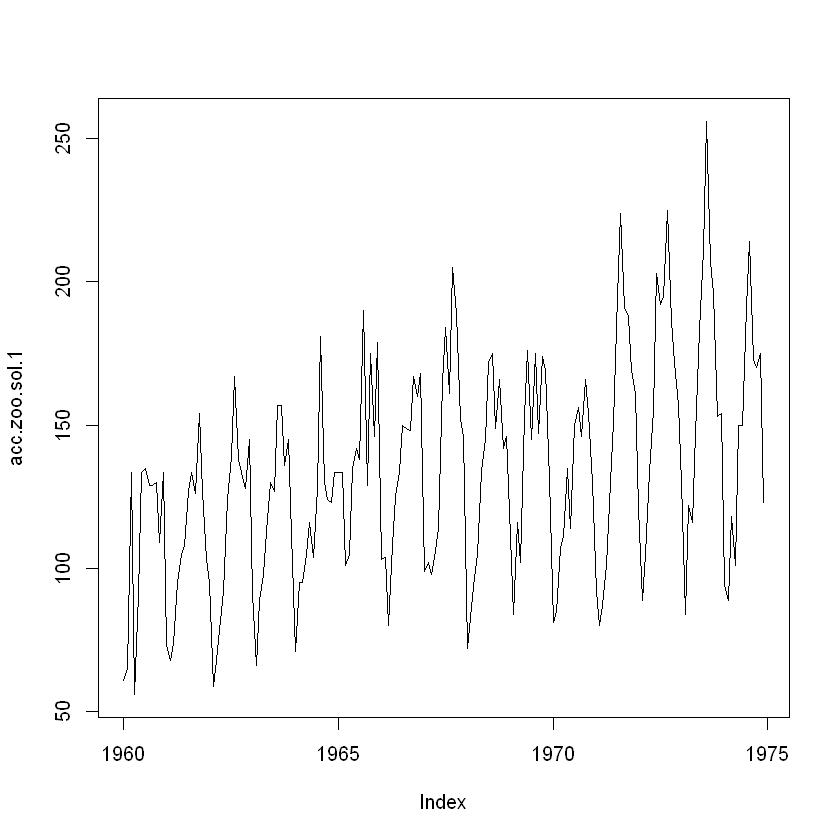

In [28]:
acc.zoo.sol.1 <- na.aggregate(object = acc.zoo, FUN = mean) # NAs por medias
plot(acc.zoo.sol.1)

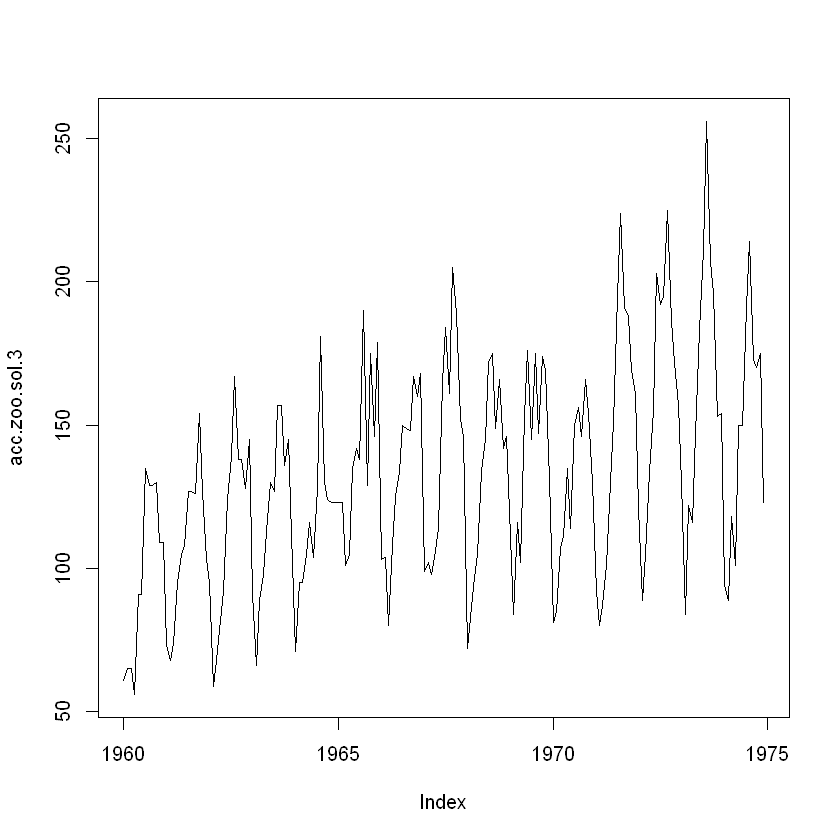

In [30]:
acc.zoo.sol.3 <- na.locf(object = acc.zoo) # NAs por el valor anterior
plot(acc.zoo.sol.3)

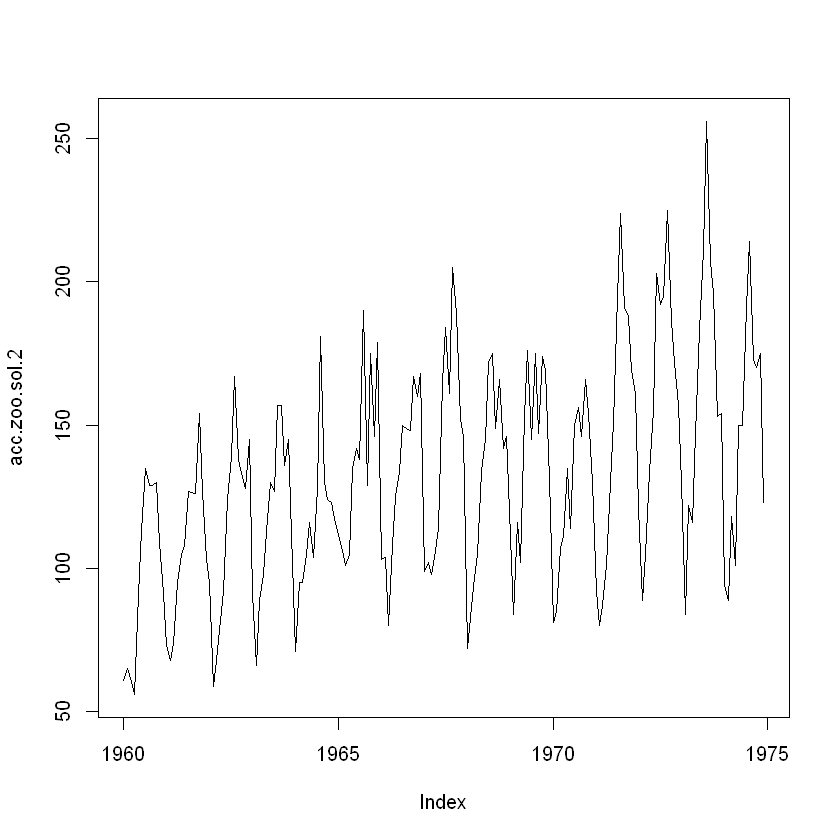

In [31]:
acc.zoo.sol.2 <- na.approx(object = acc.zoo) # NAs por una interpolacion lineal
plot(acc.zoo.sol.2)

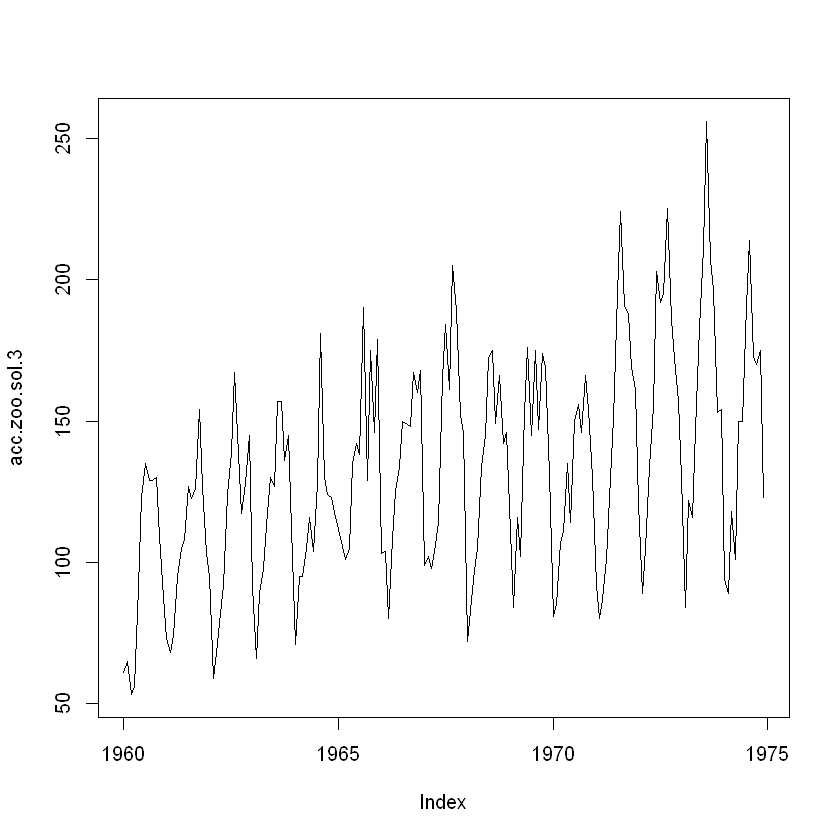

In [32]:
acc.zoo.sol.3 <- na.spline(object = acc.zoo) # NAs por splines
plot(acc.zoo.sol.3)

<br>

####  Aplicando funciones sobre subconjuntos de la serie

In [34]:
dt <- seq.Date(from = as.Date('1960-01-01'), to = as.Date('1974-12-01'), by = 'month') 
acc.zoo <- zoo(x = acc, order.by = dt)

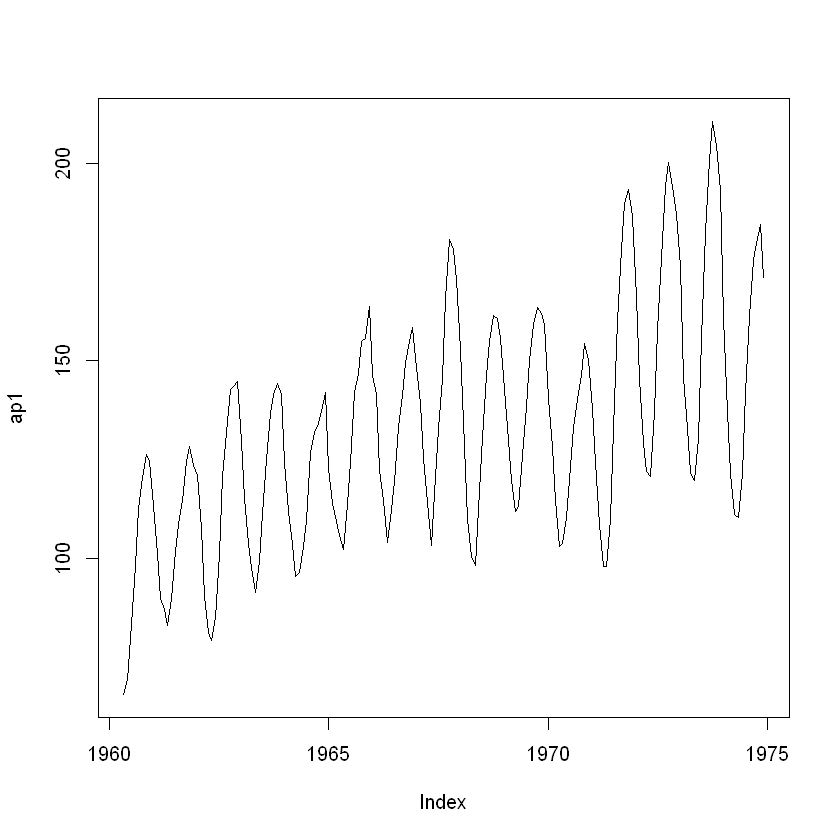

In [35]:
ap1 <- rollapply(data = acc.zoo, width = 5, FUN = mean, align = 'right')
plot(ap1)

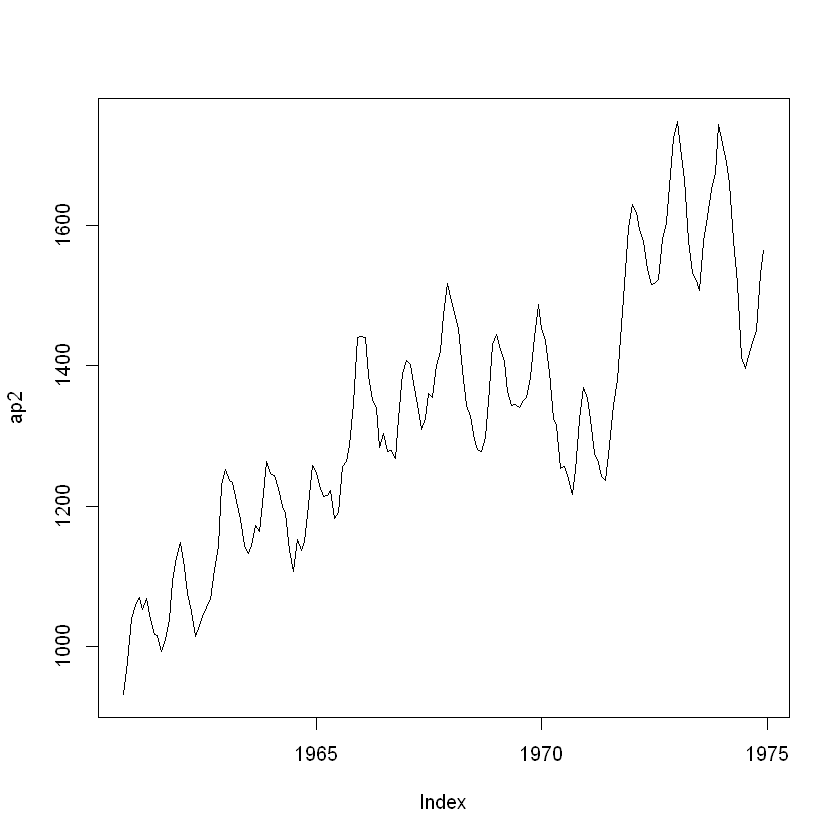

In [36]:
ap2 <- rollapply(data = acc.zoo, width = 10, FUN = sum, align = 'right')
plot(ap2)

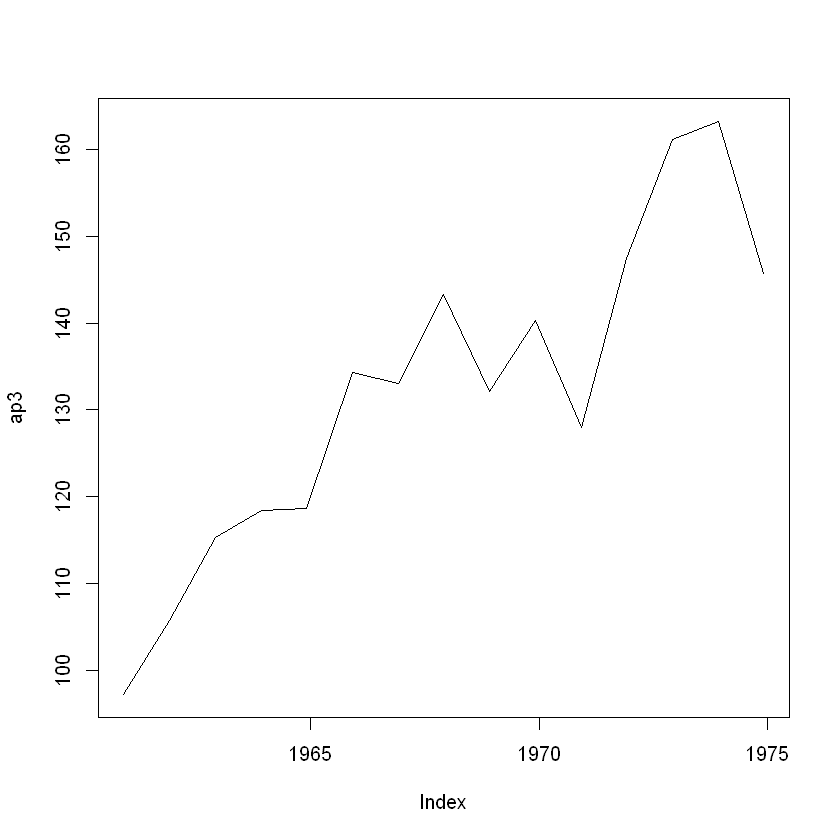

In [37]:
ap3 <- rollapply(data = acc.zoo, width = 12, FUN = mean, align = 'right', by = 12) 
plot(ap3)

<br>

#### Medias móviles a la serie mensual

In [40]:
library(ggplot2)

In [41]:
ma1 <- rollmean(x = acc.zoo, k = 6, align = 'right') # orden 6
ma2 <- rollmean(x = acc.zoo, k = 12, align = 'right') # orden 12
ma3 <- rollmean(x = acc.zoo, k = 24, align = 'right') # orden 24

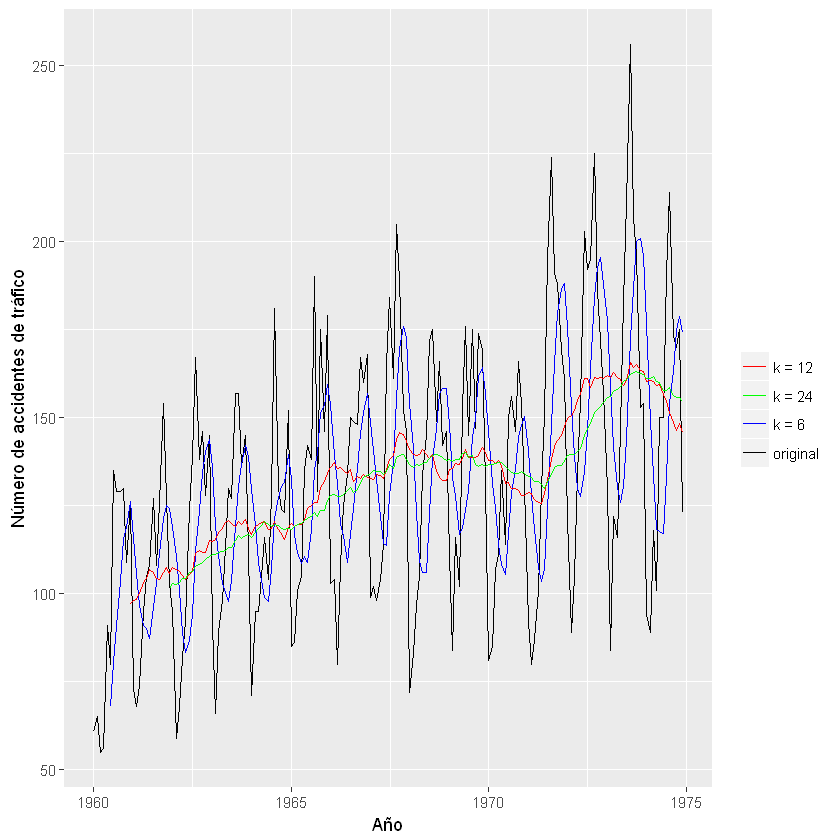

In [42]:
p <- ggplot() +
  geom_line(aes(x = index(acc.zoo), y = coredata(acc.zoo), colour = 'original')) +
  geom_line(aes(x = index(ma1), y = coredata(ma1), colour = 'k = 6')) +
  geom_line(aes(x = index(ma2), y = coredata(ma2), colour = 'k = 12')) +
  geom_line(aes(x = index(ma3), y = coredata(ma3), colour = 'k = 24')) +
  scale_color_manual(name = '',
                     values = c('k = 6' = 'blue', 'k = 12' = 'red', 'k = 24' = 'green', 'original' = 'black')) +
  xlab('Año') + ylab('Número de accidentes de tráfico')
p

<br>

#### Medias móviles a la serie cuatrimestral

In [45]:
prc <- read.csv('./quarterly-australian-national-ac.csv', sep = ',')
prc.ts <- ts(data = prc, start = c(1959, 4), frequency = 4)
head(prc.ts)

[1] 2537 3379 2999 2809 2516 2799

In [46]:
ma1 <- rollmean(x = prc.ts, k = 2, align = 'right') # orden 2
ma2 <- rollmean(x = prc.ts, k = 4, align = 'right') # orden 4

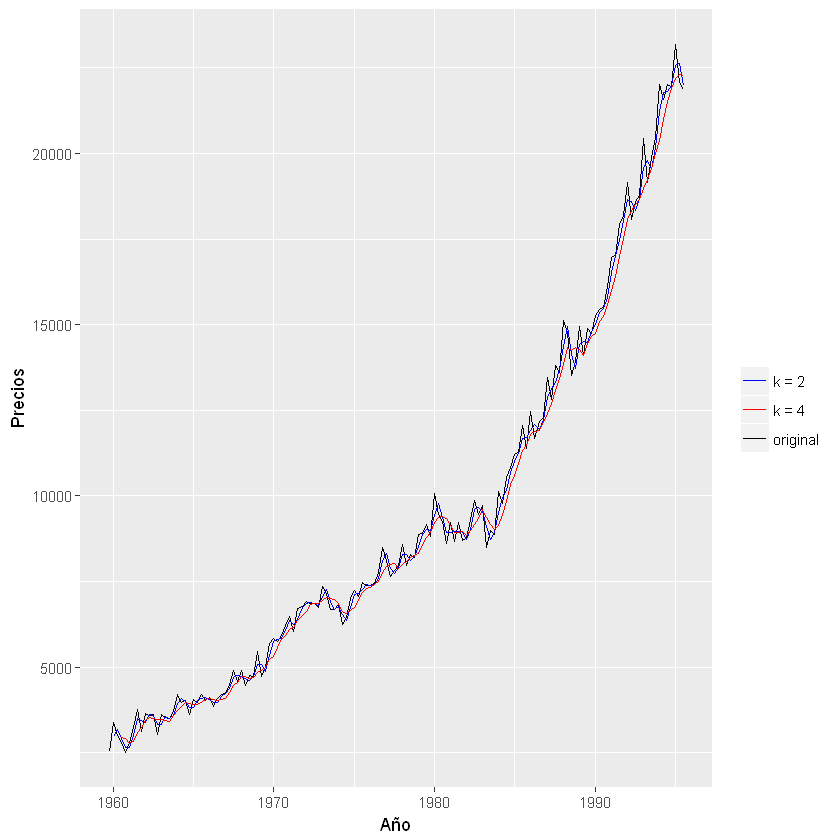

In [47]:
p <- ggplot() +
  geom_line(aes(x = index(prc.ts), y = coredata(prc.ts), colour = 'original')) +
  geom_line(aes(x = index(ma1), y = coredata(ma1), colour = 'k = 2')) +
  geom_line(aes(x = index(ma2), y = coredata(ma2), colour = 'k = 4')) +
  scale_color_manual(name = '',
                     values = c('k = 2' = 'blue', 'k = 4' = 'red', 'original' = 'black')) +
  xlab('Año') + ylab('Precios')
p

<br><br>

## Formato xts

In [50]:
library(xts)

Warning message:
"package 'xts' was built under R version 3.3.3"

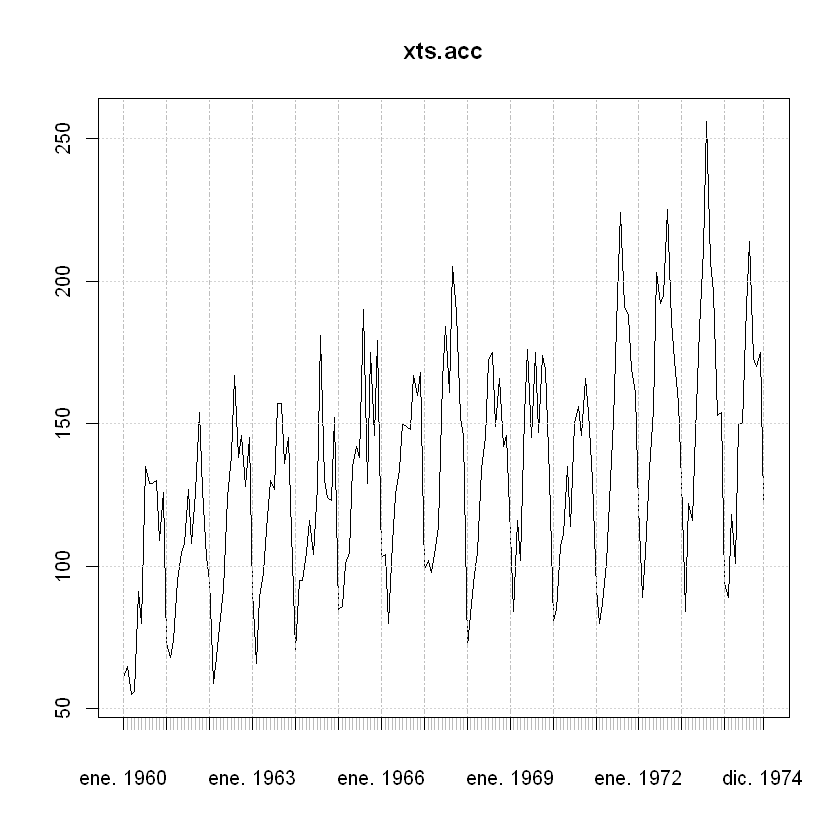

In [51]:
xts.acc <- xts(x = acc, order.by = dt)
plot(xts.acc)

<br>

#### Subsetting de observaciones de la serie

In [52]:
xts.acc['1963-12'] # diciembre de 1963
xts.acc['1963'] # el año completo de 1963
xts.acc['/1963-7'] # todas las observaciones hasta julio de 1963
xts.acc['1963-7/'] # todas las observaciones a partir de julio de 1963
xts.acc['1962-7/1963-7'] # todas las observaciones comprendidas entre julio de 1962 y de 1963

           Month..Monthly.traffic.fatalities.in.Ontario.1960.1974.
1963-12-01                                                     112

           Month..Monthly.traffic.fatalities.in.Ontario.1960.1974.
1963-01-01                                                      91
1963-02-01                                                      66
1963-03-01                                                      89
1963-04-01                                                      98
1963-05-01                                                     113
1963-06-01                                                     130
1963-07-01                                                     127
1963-08-01                                                     157
1963-09-01                                                     157
1963-10-01                                                     136
1963-11-01                                                     145
1963-12-01                                                     112

           Month..Monthly.traffic.fatalities.in.Ontario.1960.1974.
1960-01-01                                                      61
1960-02-01                                                      65
1960-03-01                                                      55
1960-04-01                                                      56
1960-05-01                                                      91
1960-06-01                                                      80
1960-07-01                                                     135
1960-08-01                                                     129
1960-09-01                                                     129
1960-10-01                                                     130
1960-11-01                                                     109
1960-12-01                                                     126
1961-01-01                                                      73
1961-02-01                                                    

           Month..Monthly.traffic.fatalities.in.Ontario.1960.1974.
1963-07-01                                                     127
1963-08-01                                                     157
1963-09-01                                                     157
1963-10-01                                                     136
1963-11-01                                                     145
1963-12-01                                                     112
1964-01-01                                                      71
1964-02-01                                                      95
1964-03-01                                                      95
1964-04-01                                                     105
1964-05-01                                                     116
1964-06-01                                                     104
1964-07-01                                                     128
1964-08-01                                                    

           Month..Monthly.traffic.fatalities.in.Ontario.1960.1974.
1962-07-01                                                     139
1962-08-01                                                     167
1962-09-01                                                     138
1962-10-01                                                     146
1962-11-01                                                     128
1962-12-01                                                     145
1963-01-01                                                      91
1963-02-01                                                      66
1963-03-01                                                      89
1963-04-01                                                      98
1963-05-01                                                     113
1963-06-01                                                     130
1963-07-01                                                     127

<br><br>

## RDataMarket API
 <a href="https://datamarket.com/data/list/?q=provider%3Atsdl">Time Series Data Library (DataMarket)</a> 

In [54]:
library(rdatamarket)

Warning message:
"package 'rdatamarket' was built under R version 3.3.3"

In [56]:
accidentes <- as.ts(dmseries('http://data.is/1yFXOBi'))
accidentes

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1960  61  65  55  56  91  80 135 129 129 130 109 126
1961  73  68  74  95 105 108 127 108 126 154 127 103
1962  95  59  68  82  92 124 139 167 138 146 128 145
1963  91  66  89  98 113 130 127 157 157 136 145 112
1964  71  95  95 105 116 104 128 181 130 124 123 152
1965  85  86 101 105 135 142 138 190 129 175 146 179
1966 103 104  80 108 125 134 150 149 148 167 160 168
1967  99 102  98 104 114 165 184 161 205 189 152 146
1968  72  83  97 105 134 145 172 175 149 166 142 146
1969 111  84 116 102 153 176 145 175 147 174 169 131
1970  81  85 107 111 135 114 150 156 146 166 154 130
1971  92  80  87 101 130 151 195 224 191 188 169 161
1972 121  89 105 134 155 203 192 195 225 186 172 157
1973 130  84 122 116 147 183 211 256 207 196 153 154
1974  94  89 118 101 150 150 191 214 173 170 175 123